### 1. Import dataset


1.a. Load the "train-val.csv" dataset.


In [1]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()

# Define the filename and create the full file path
filename_1 = 'train-val.csv'
file_path_1 = os.path.join(cwd, filename_1)

# Read the CSV file into a Pandas DataFrame
train_val = pd.read_csv(file_path_1)

# Print the contents of the DataFrame
print("Train-Val Data:\n")
print(train_val)


Train-Val Data:

          id        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0          1  2009-03-04   Albury     13.8     22.1       0.2          NaN   
1          2  2009-03-05   Albury     11.5     22.0       0.0          NaN   
2          3  2009-03-09   Albury     13.8     31.8       0.0          NaN   
3          4  2009-03-10   Albury     15.5     32.0       0.0          NaN   
4          5  2009-03-11   Albury     18.4     30.5       1.2          NaN   
...      ...         ...      ...      ...      ...       ...          ...   
48418  48419  2017-06-12    Uluru      5.1     19.7       0.0          NaN   
48419  48420  2017-06-16    Uluru      5.2     24.3       0.0          NaN   
48420  48421  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
48421  48422  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
48422  48423  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed  ..

1.b. Load the "test.csv" dataset.


In [2]:
# Define the filename and create the full file path for the second CSV file (test.csv)
filename_2 = 'test.csv'
file_path_2 = os.path.join(cwd, filename_2)

# Read the second CSV file into a Pandas DataFrame
test = pd.read_csv(file_path_2)

# Print the contents of the second DataFrame
print("Test Data:\n")
print(test)


Test Data:

            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     22/03/2009   Albury     14.6     30.0       0.0          NaN       NaN   
1     15/04/2009   Albury     10.7     21.9       0.0          NaN       NaN   
2     21/04/2009   Albury      5.7     21.4       0.0          NaN       NaN   
3     24/04/2009   Albury     10.6     16.2       0.0          NaN       NaN   
4     19/05/2009   Albury      3.7     19.1       0.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
9694  30/04/2017    Uluru     12.7     21.0       0.0          NaN       NaN   
9695  07/05/2017    Uluru     10.8     27.0       0.0          NaN       NaN   
9696  11/05/2017    Uluru      4.1     24.7       0.0          NaN       NaN   
9697  09/06/2017    Uluru      3.4     19.8       0.0          NaN       NaN   
9698  17/06/2017    Uluru      6.4     23.4       0.0          NaN       NaN   

     WindGustDir  WindGustS

### Exploratory Data Analysis (EDA)


Using appropriate methods, present in code information about:
<br>    2a. the number of samples and characteristics of the data set,
<br>    2b. the type of characteristics of the data set,
<br>    2c. the attribute labels,
<br>    2d. the number of categories,
<br>    2e. how many samples belong to each category,
<br>    2f. the correlation between the data,
<br>    2g. any other information you think is useful for understanding the data set.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Display concise information about the DataFrame (train_val)
train_val.info()  # This line gives a concise summary of the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

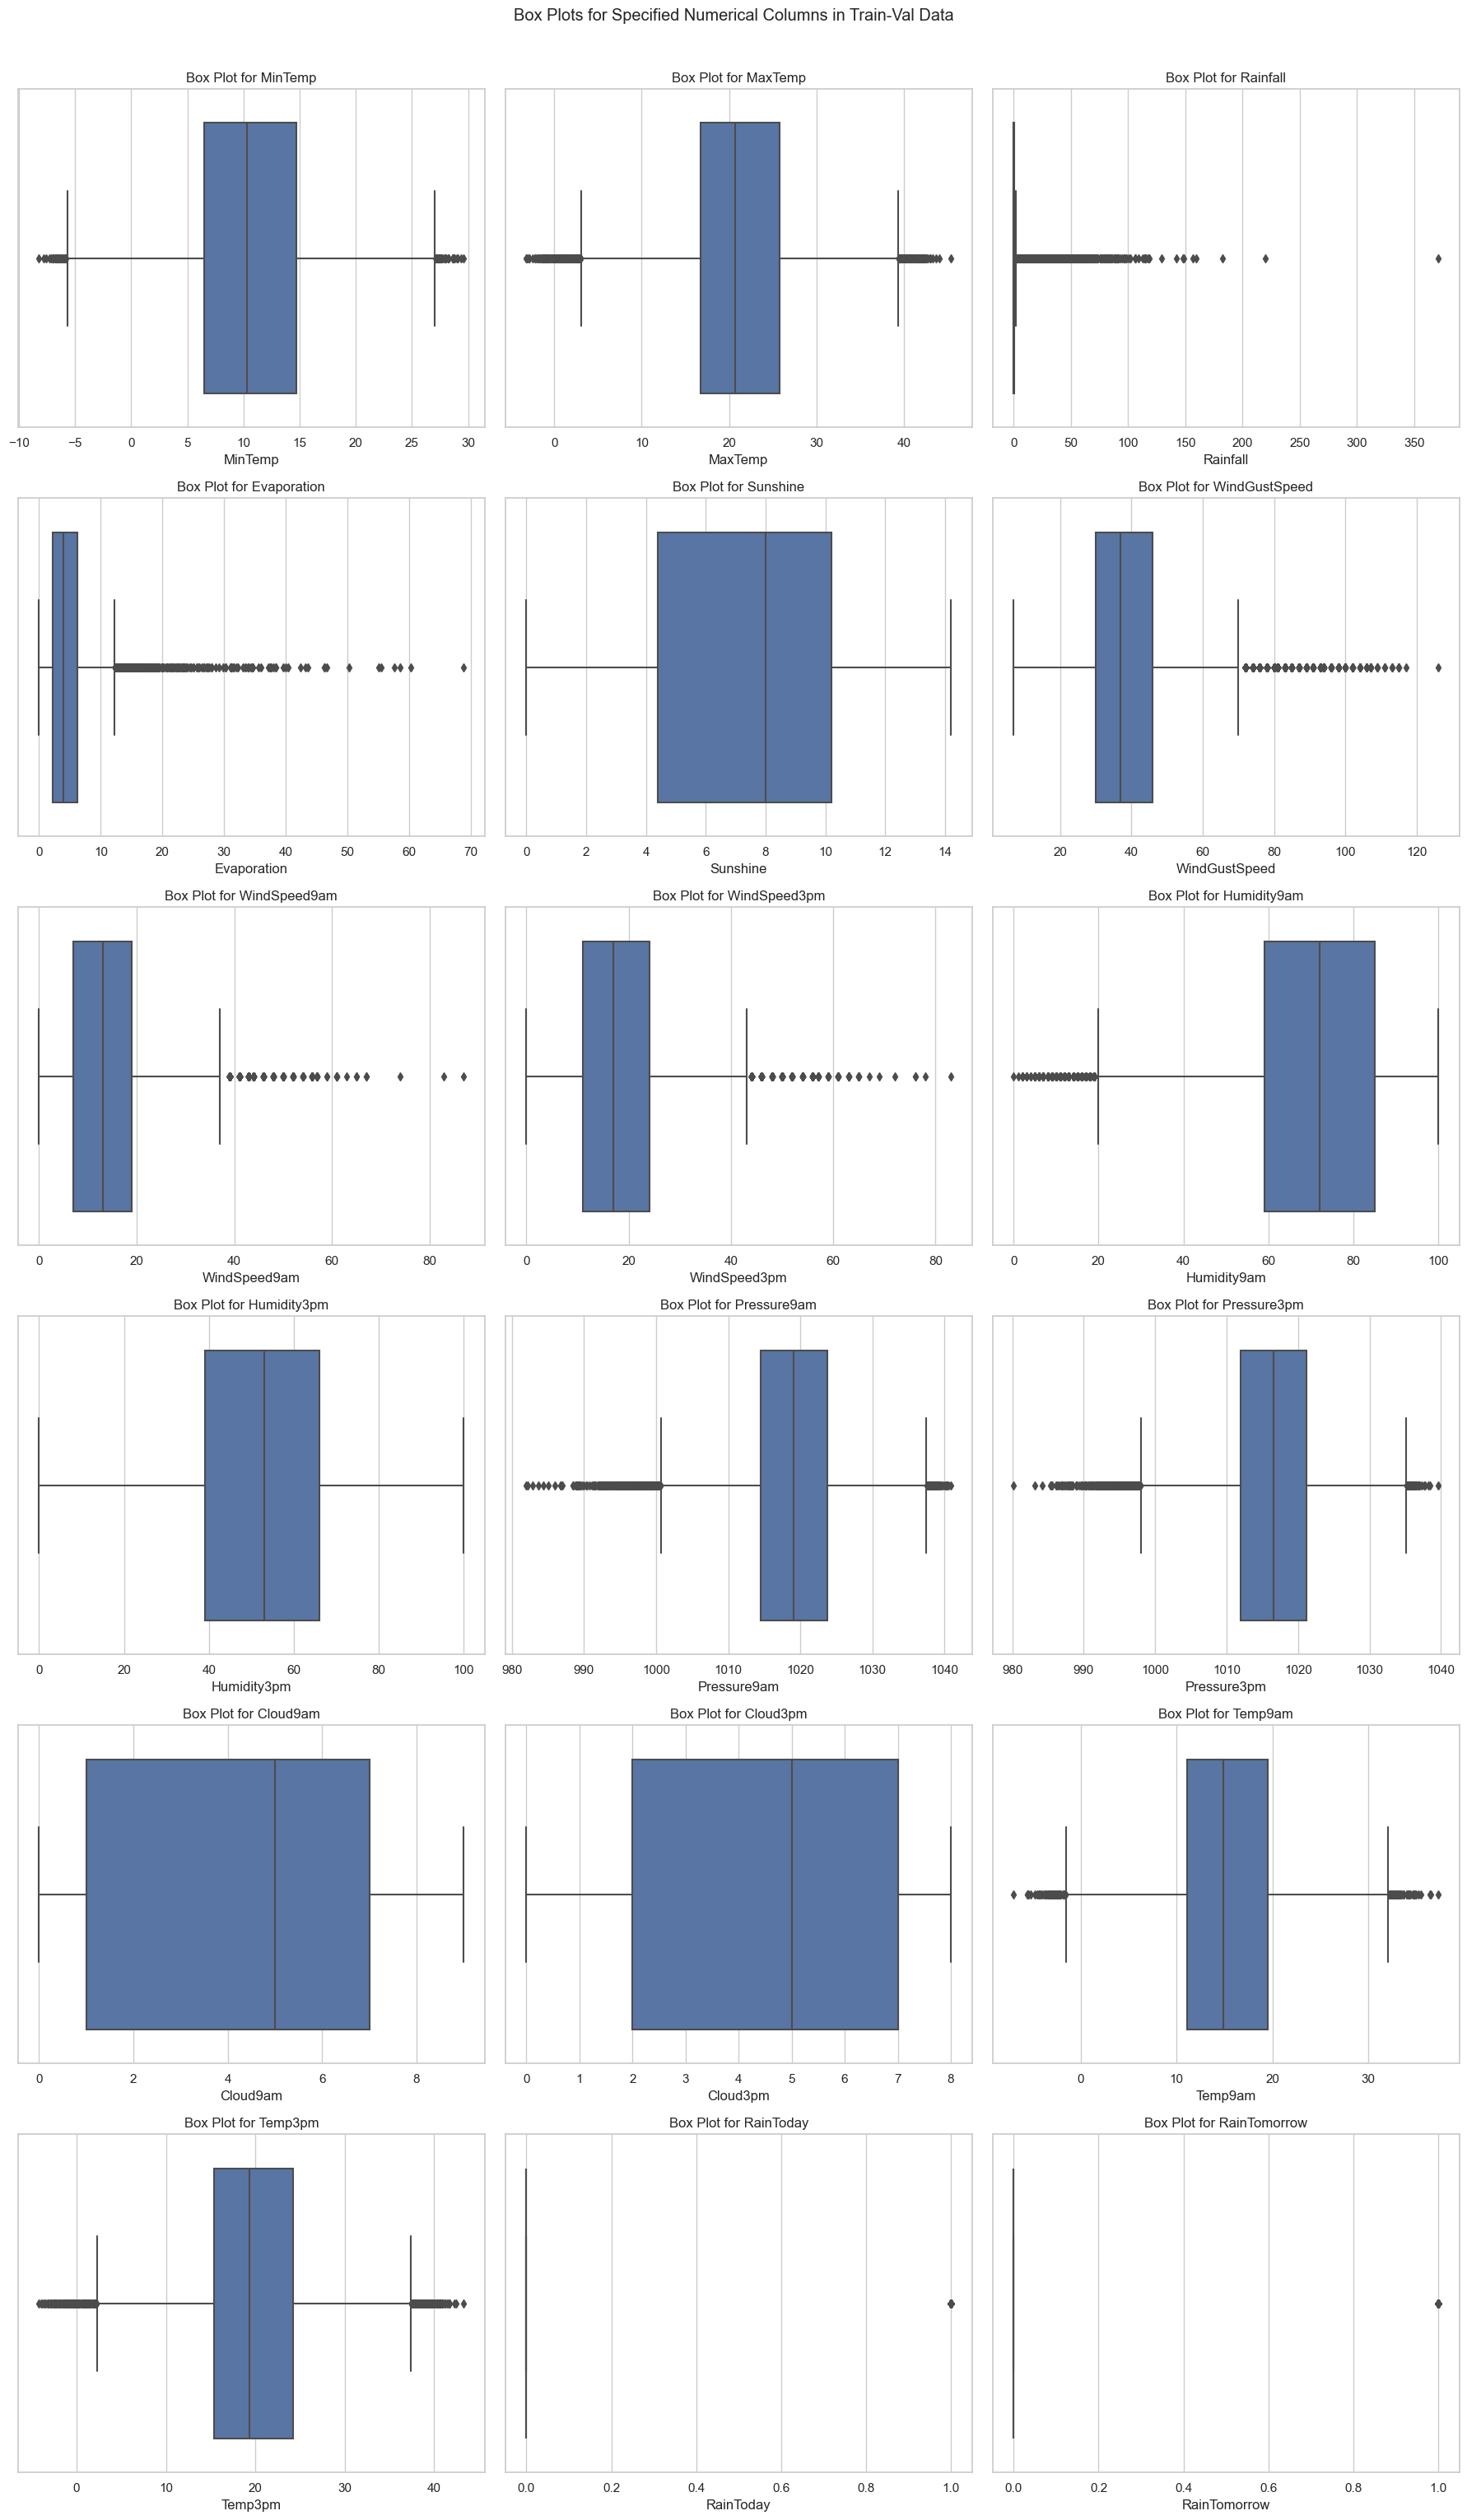

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = train_val.select_dtypes(include=np.number).columns.drop('id')

# Set the style for the plots 
sns.set(style="whitegrid")

# Calculate the number of rows and columns for the subplot grid
num_plots = len(numeric_columns)
num_rows = (num_plots // 3) + (num_plots % 3)  # Calculate the number of rows

# Create a figure with appropriate size based on the number of rows
plt.figure(figsize=(18, 5 * num_rows))

# Iterate over each numerical column and create a box plot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)  # Set up subplots
    sns.boxplot(x=train_val[column])  # Create a box plot for the current column
    plt.title(f'Box Plot for {column}')  # Set title for the current subplot

# Adjust layout for better spacing
plt.tight_layout()

# Set the overall title for the entire set of box plots
plt.suptitle('Box Plots for Specified Numerical Columns in Train-Val Data', y=1.02)

# Show the plot
plt.show()


In [5]:
# Set the display option for float format to show two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate and print the sum of values in numeric columns (excluding the 'id' column)
numeric_columns = train_val.select_dtypes(include=[np.number]).drop(columns=['id'])
sum_values = numeric_columns.sum()
print("Sum of values in numeric columns (excluding 'id'):\n", sum_values)

# Provide summary statistics for numerical columns in the dataset (excluding the 'id' column)
# This includes count, mean, std (standard deviation), min, 25%, 50% (median), 75%, and max values.
summary_statistics = train_val.drop(columns=['id']).describe()
print("\nSummary statistics for numerical columns (excluding 'id'):\n", summary_statistics)


Sum of values in numeric columns (excluding 'id'):
 MinTemp           514557.40
MaxTemp          1037396.80
Rainfall          107430.90
Evaporation       128722.30
Sunshine          182107.60
WindGustSpeed    1772310.00
WindSpeed9am      657070.00
WindSpeed3pm      867041.00
Humidity9am      3378072.00
Humidity3pm      2489864.00
Pressure9am     44471999.20
Pressure3pm     44355594.00
Cloud9am          134559.00
Cloud3pm          134140.00
Temp9am           742809.20
Temp3pm           951415.10
RainToday          11225.00
RainTomorrow       11059.00
dtype: float64

Summary statistics for numerical columns (excluding 'id'):
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count 48263.00 48322.00  48423.00     28039.00  25426.00       45330.00   
mean     10.66    21.47      2.22         4.59      7.16          39.10   
std       6.06     6.56      7.38         3.47      3.61          14.00   
min      -8.20    -3.20      0.00         0.00      0.00           7

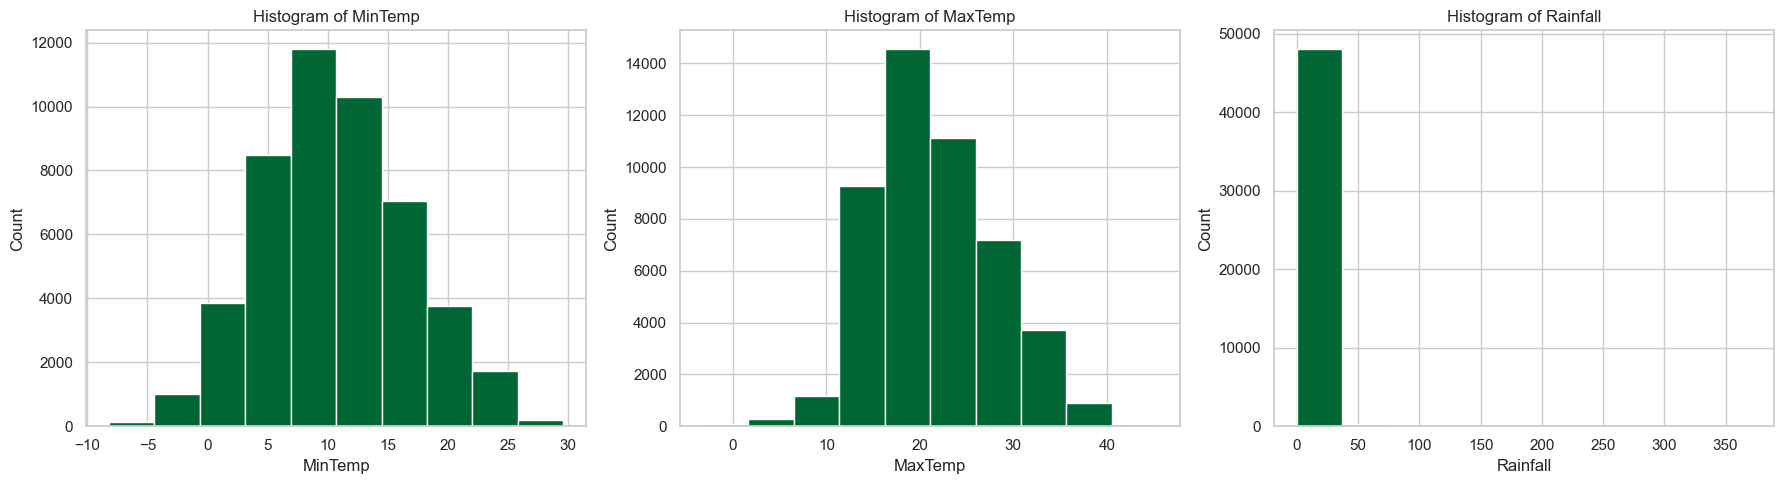

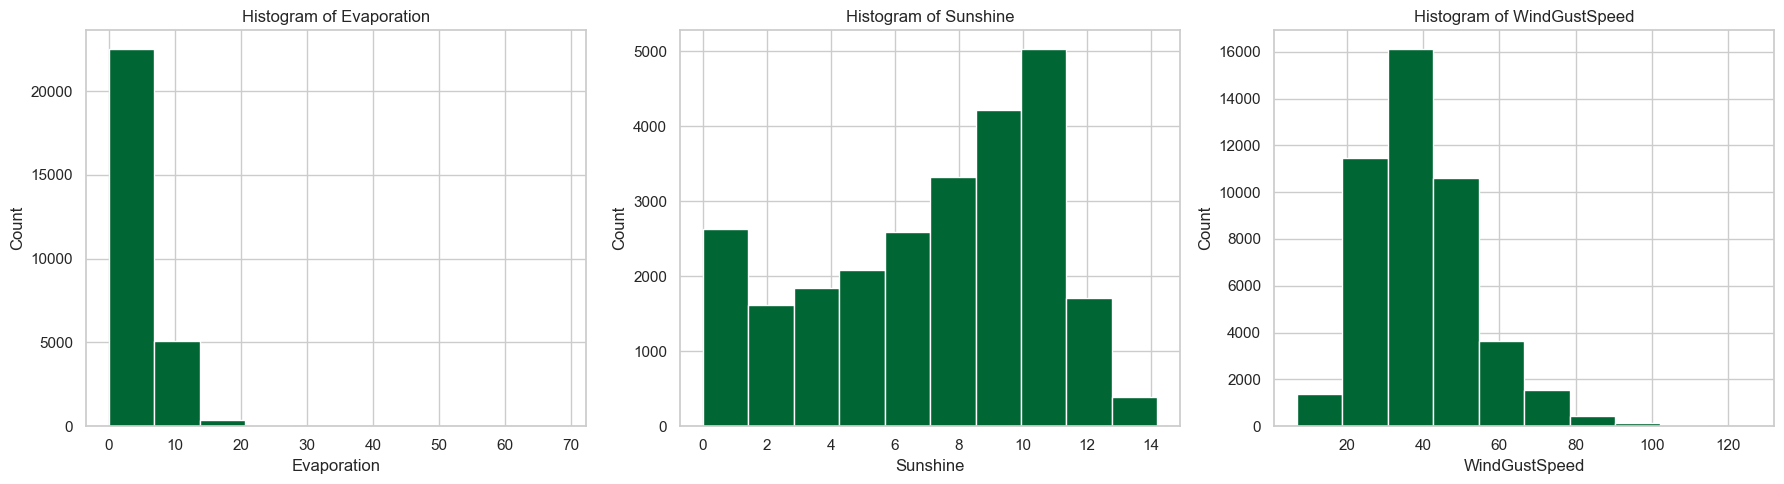

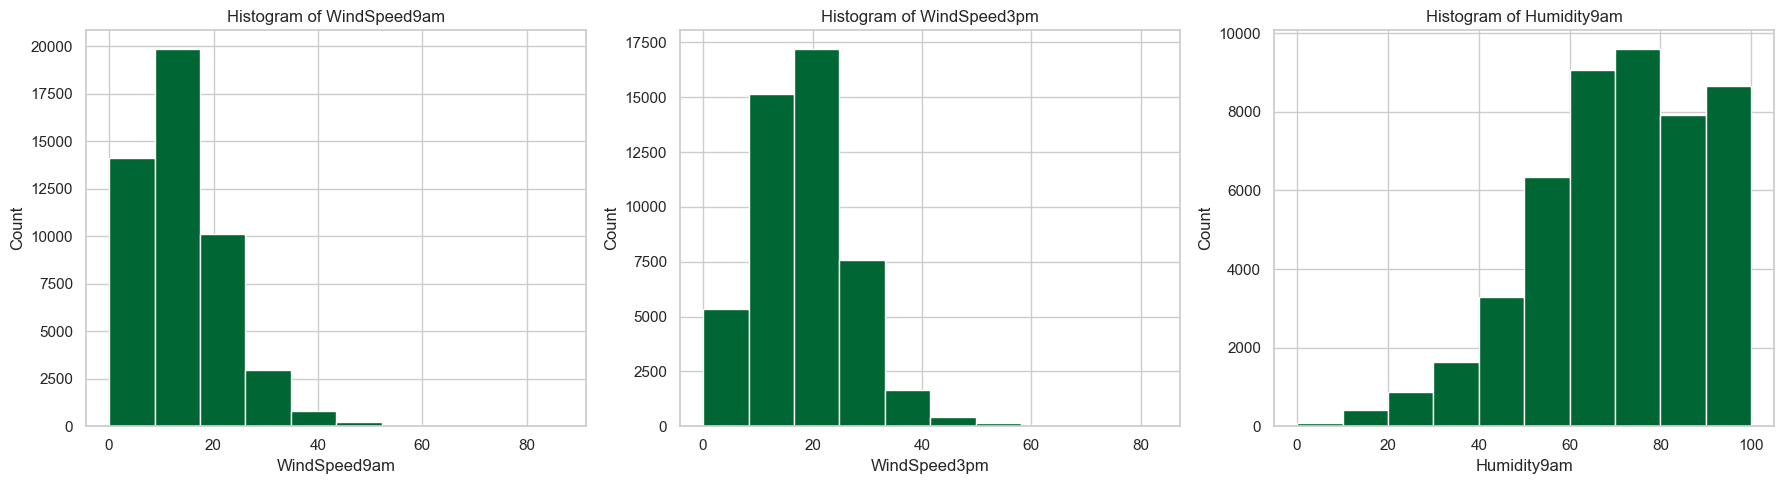

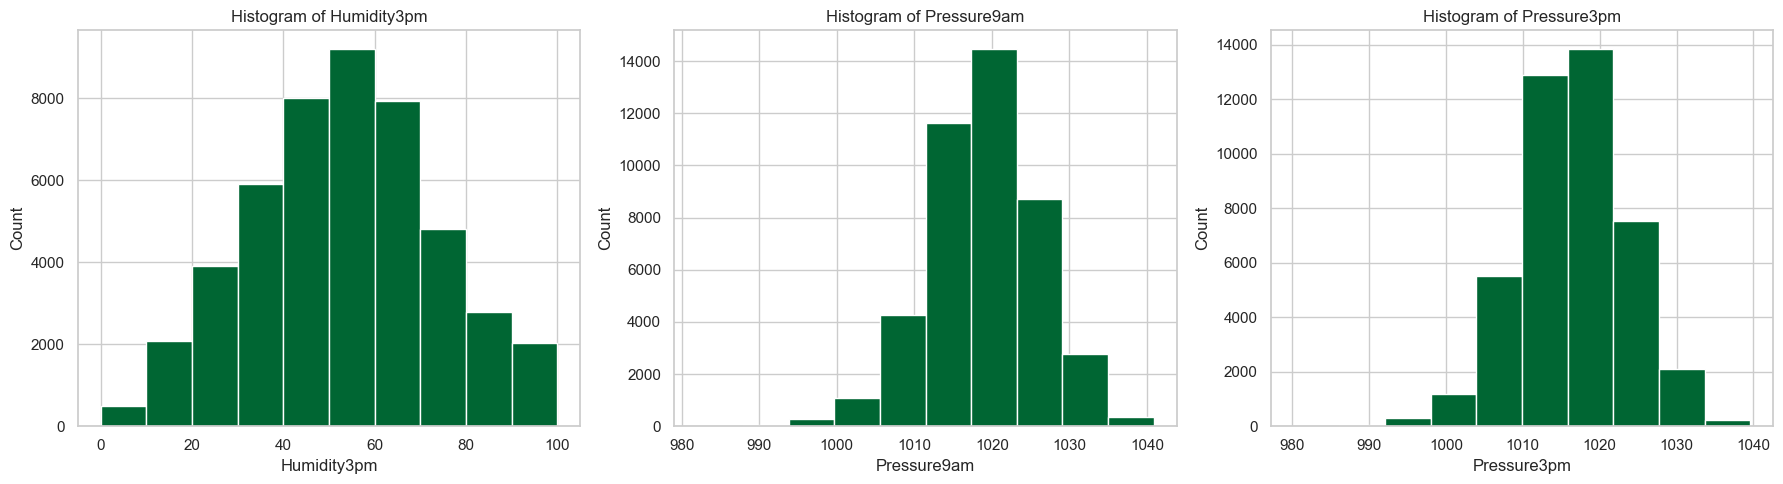

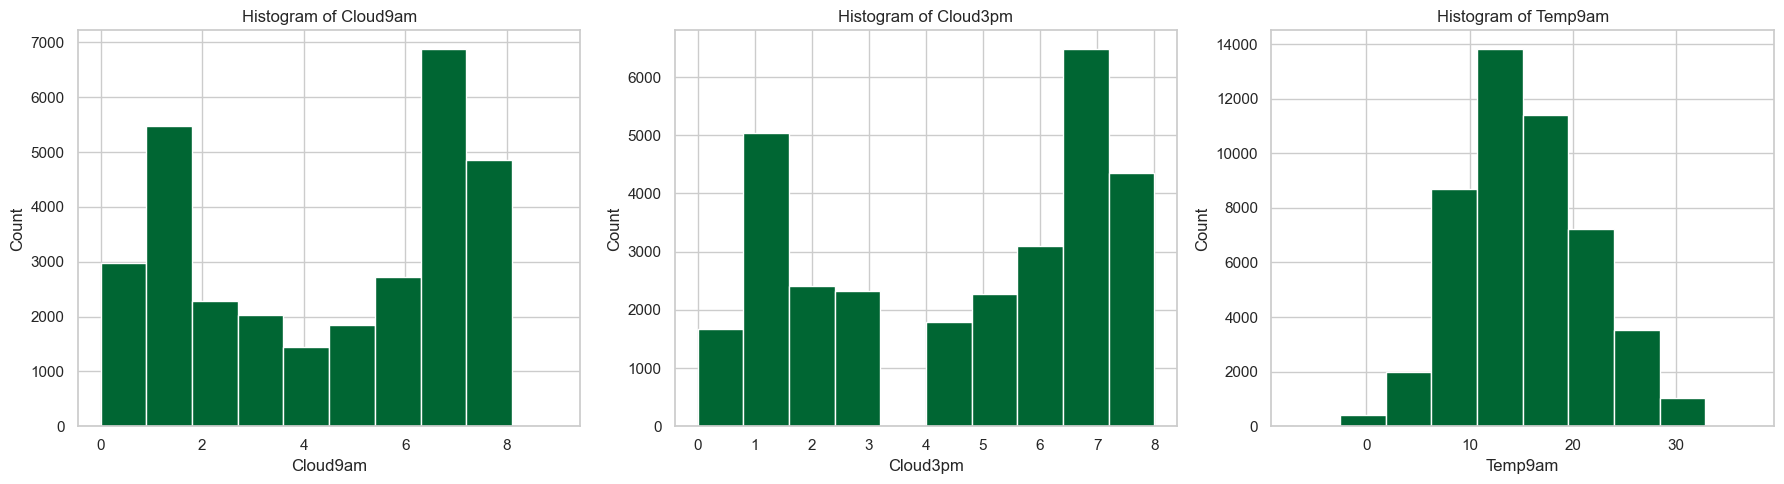

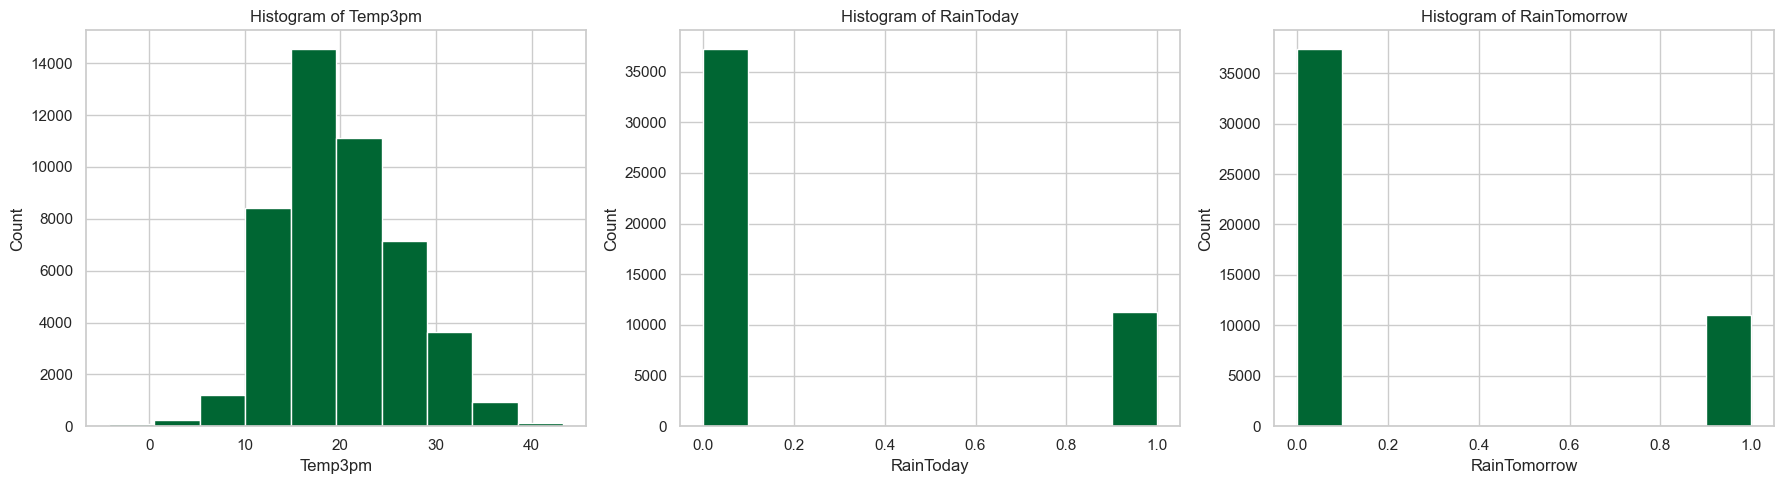

In [6]:
# Specify columns or use select_dtypes to choose numerical columns only (excluding 'id' column)
numeric_columns = train_val.select_dtypes(include=np.number).columns.drop('id')

forest_green = '#006633'  # Hex color code for green

# Display histograms
for i in range(0, len(numeric_columns), 3):
    columns_subset = numeric_columns[i:i+3]  # Select three columns for the current iteration

    # Create subplots for the current set of three columns
    plt.figure(figsize=(18, 5))
    
    for j, column in enumerate(columns_subset, 1):
        plt.subplot(1, 3, j)
        plt.hist(train_val[column], bins=10, color=forest_green)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.tight_layout() 
    plt.show()


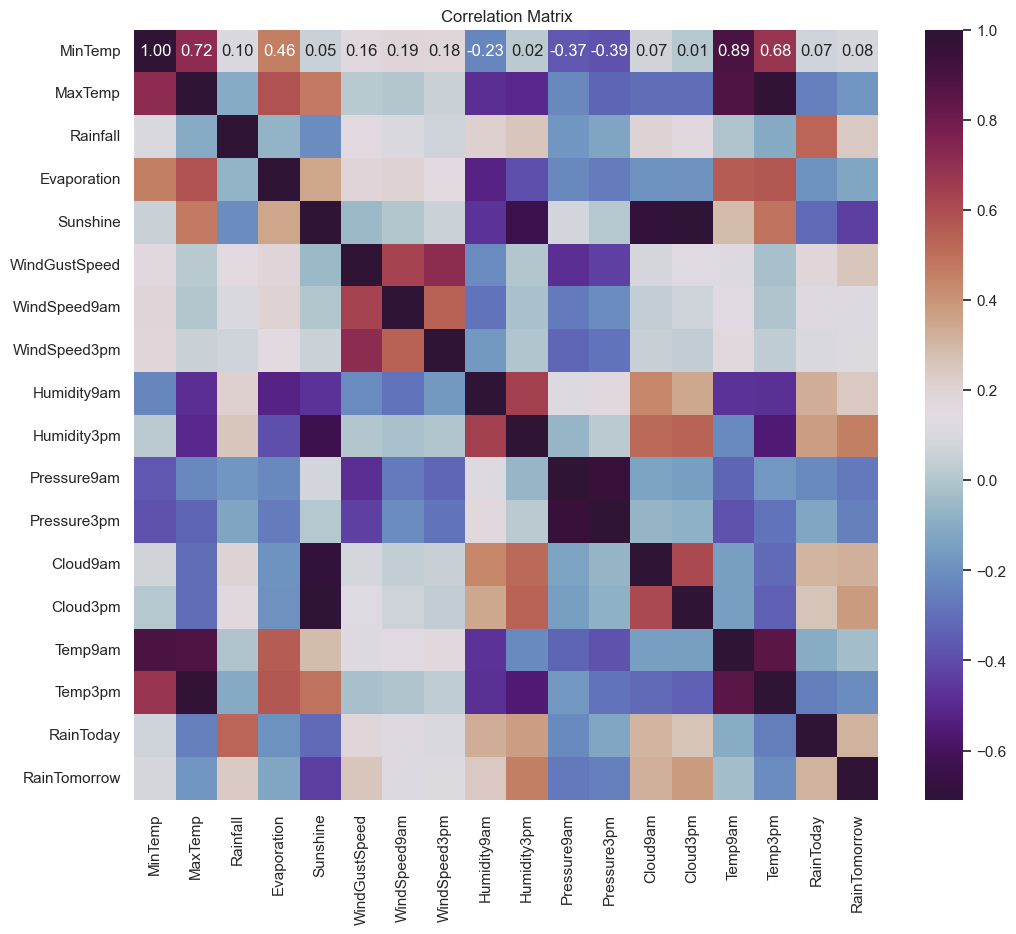

In [7]:
custom_palette = "twilight_shifted"

# Select only the numerical columns for the correlation matrix
numerical_columns = train_val.select_dtypes(include=[np.number]).drop(columns=['id'])

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the figure and axis for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix using the custom color palette
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")

# Set the plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


### 3. Data set preprocessing

Use the Column Transformer to create and apply separate transformers for numeric and categorical data.





In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd

3.a. Choosing which features are important to keep.

In [9]:
# Identify numeric columns
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                   'Temp9am', 'Temp3pm', 'RainToday']

# Identify categorical columns
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


3.b. Write appropriate code to handle the missing values.

In [10]:
# Calculate the number of missing values for each column in the 'train_val' DataFrame
missing_values = train_val.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64


3.c. Write code to appropriately convert the categorical variables so that the classifiers you will use can handle them.


In [11]:
# Define a transformer for categorical data using a pipeline

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Step 1: Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])  # Step 2: One-hot encode categorical features

# This pipeline is designed to handle categorical data. 
# The 'imputer' step replaces missing values with the most frequent value in each column.
# The 'onehot' step performs one-hot encoding on the categorical features, creating binary columns for each category.
# The 'handle_unknown' parameter ensures that unknown categories in new data are ignored during one-hot encoding.
# The 'sparse_output=False' parameter ensures that the output is a dense array instead of a sparse matrix.


3.d. Write code to scale the attributes


In [12]:
# Define a transformer for numeric data using a pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Replace missing values with the mean value
    ('scaler', StandardScaler())])  # Step 2: Standardize numeric features

# This pipeline is designed to handle numeric data.
# The 'imputer' step replaces missing values with the mean value in each numeric column.
# The 'scaler' step standardizes numeric features, ensuring that they have a mean of 0 and a standard deviation of 1.
# Standardization is beneficial for certain machine learning algorithms that are sensitive to the scale of input features.


3.e. Perform all the previous pretraining steps (using transforms) so that the initial set is "clean" to use for training the classifiers.


In [13]:
# Define the ColumnTransformer to handle both numeric and categorical features

myPreprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  # Apply numeric transformer to numeric columns
        ('cat', categorical_transformer, categorical_columns)  # Apply categorical transformer to categorical columns
    ]
    
)

# Apply the transformations to the entire dataset
train_val_clean = myPreprocessor.fit_transform(train_val)

# Get the transformed column names for the one-hot encoded categorical features
cat_feature_names = myPreprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(input_features=categorical_columns)

# Concatenate the transformed numeric and categorical feature names
all_feature_names = list(numeric_columns) + list(cat_feature_names)

# Create a DataFrame with the transformed data and feature names
train_val_clean_df = pd.DataFrame(train_val_clean, columns=all_feature_names)

# Print the column names after transformation
print("Transformed Column Names:")
print(train_val_clean_df.columns)

# Save the DataFrame as a CSV file
#train_val_clean_df.to_csv('train_val_clean_data.csv', index=False)

# Check for missing values in the transformed DataFrame
missing_values = train_val_clean_df.isnull().sum()

# Print the number of missing values in each column after transformation
print("\nNumber of missing values in each column after transformation:\n")
print(missing_values)

# The code performs data preprocessing using the defined transformers and saves the cleaned dataset to a CSV file.
# It also checks for missing values in the transformed dataset, ensuring data integrity.


Transformed Column Names:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=114)

Number of missing values in each column after transformation:

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 114, dtype: int64


3.f. After you have "cleaned" the initial training set, write the appropriate code to generate the x and y sets from the initial training set.

 The 'RainTomorrow' column is the value we want our classifier to predict.


In [14]:
# Select features (X) and target variable (y) from the 'train_val' DataFrame

selected_features = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindDir9am',
                     'WindDir3pm', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                     'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']

X = train_val[selected_features]  # Features (input variables)

# Select the target variable ('RainTomorrow') and convert it to a 1D NumPy array
y = train_val['RainTomorrow'].to_numpy().flatten()  # Target variable (output variable)

# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (48423, 21)
Shape of y: (48423,)


3.g. Divide the dataset into a training set (train set) and a validation set (validation set) (the split should be 70% train set and 30% validation set).


In [15]:
from sklearn.model_selection import train_test_split

random_seed = 42  # Set a random seed for reproducibility

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# The 'train_test_split' function is used to randomly split the dataset into training and testing sets.
# X_train and y_train are the features and target variable for training, respectively.
# X_test and y_test are the features and target variable for testing, respectively.
# The 'test_size' parameter determines the proportion of the dataset to include in the test split.
# The 'random_state' parameter sets a seed for reproducibility, ensuring that the same split is obtained each time.


### 4. Model training with default values in the classifier parameters

We will train the following classifiers with our training data set:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP with a hidden layer
5. SVC
6. Decision Tree
7. Random Forest

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

4.a. Train (fit) all 7 classifiers mentioned above using the default values for all their parameters.


In [17]:
# 1. Naive Bayes

# Create a pipeline with preprocessing and the Gaussian Naive Bayes classifier
naive_bayes_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline on the training data
naive_bayes_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + Naive Bayes) is trained and ready for predictions.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', GaussianNB())])

In [18]:
# 2. KNeighborsClassifier

# Create a pipeline with preprocessing and the KNeighborsClassifier
knn_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),  # Include the preprocessor in the pipeline
    ('classifier', KNeighborsClassifier())  # Add the KNeighborsClassifier as the classifier
])

# Fit the pipeline on the training data
knn_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + KNeighborsClassifier) is trained and ready for predictions.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', KNeighborsClassifier())])

In [19]:
# 3. Logistic Regression

# Create a pipeline with preprocessing and the Logistic Regression classifier
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),
    ('classifier', LogisticRegression())  # Increase max_iter to 1000 or a higher value
])

# Fit the pipeline on the training data
logistic_regression_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + Logistic Regression) is trained and ready for predictions.


C:\Users\zoege\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', LogisticRegression())])

In [20]:
# 4. MLP with a hidden layer

# Create a pipeline with preprocessing and the MLPClassifier
mlp_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),  # Include the preprocessor in the pipeline
    ('classifier', MLPClassifier())  # Add the MLPClassifier, Increase max_iter to 500 or a higher value
])

# Fit the pipeline on the training data
mlp_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + MLP with a hidden layer) is trained and ready for predictions.


C:\Users\zoege\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', MLPClassifier())])

In [ ]:
# 5. SVC (Support Vector Classifier)

# Create a pipeline with preprocessing and the Support Vector Classifier
svc_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),  # Include the preprocessor in the pipeline
    ('classifier', SVC())  # Add the Support Vector Classifier
])
 
# Fit the pipeline on the training data
svc_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + Support Vector Classifier) is trained and ready for predictions.

In [ ]:
# 6. Decision Tree

# Create a pipeline with preprocessing and the Decision Tree classifier
decision_tree_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),  # Include the preprocessor in the pipeline
    ('classifier', DecisionTreeClassifier())  # Add the Decision Tree classifier
])

# Fit the pipeline on the training data
decision_tree_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + Decision Tree) is trained and ready for predictions.

In [ ]:
# 7. Random Forest

# Create a pipeline with preprocessing and the Random Forest classifier
random_forest_model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),  # Include the preprocessor in the pipeline
    ('classifier', RandomForestClassifier())  # Add the Random Forest classifier
])

# Fit the pipeline on the training data
random_forest_model.fit(X_train, y_train)

# Now, the entire pipeline (preprocessing + Random Forest) is trained and ready for predictions.

4.b. Apply to the trained models from the validation set only the samples without their label (predict).


In [ ]:
# Get predictions for each model on the validation set (X_test)

# Naive Bayes predictions
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# K-Nearest Neighbors (KNN) predictions
knn_predictions = knn_model.predict(X_test)

# Logistic Regression predictions
logistic_regression_predictions = logistic_regression_model.predict(X_test)

# Multi-Layer Perceptron (MLP) predictions
mlp_predictions = mlp_model.predict(X_test)

# Support Vector Classifier (SVC) predictions
svc_predictions = svc_model.predict(X_test)

# Decision Tree predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

# Random Forest predictions
random_forest_predictions = random_forest_model.predict(X_test)


4.c. Compare the output of each model against the corresponding validation set labels and evaluate their performance using the F1 score.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Evaluate accuracy score and classification report for each model

# Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_classification_report = classification_report(y_test, naive_bayes_predictions)
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions, average='binary')  # Assuming binary classification

# K-Nearest Neighbors (KNN)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions, average='binary')

# Logistic Regression
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_classification_report = classification_report(y_test, logistic_regression_predictions)
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions, average='binary')

# Multi-Layer Perceptron (MLP)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_classification_report = classification_report(y_test, mlp_predictions)
mlp_f1 = f1_score(y_test, mlp_predictions, average='binary')

# Support Vector Classifier (SVC)
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_classification_report = classification_report(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions, average='binary')

# Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='binary')

# Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_classification_report = classification_report(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='binary')


# Print accuracy scores, F1 scores, and classification reports with added space
print("\nNaive Bayes Accuracy Score:", naive_bayes_accuracy)
print("Naive Bayes F1 Score:", naive_bayes_f1)
print("Naive Bayes Classification Report:\n", naive_bayes_classification_report)

print("\nKNN Accuracy Score:", knn_accuracy)
print("KNN F1 Score:", knn_f1)
print("KNN Classification Report:\n", knn_classification_report)

print("\nLogistic Regression Accuracy Score:", logistic_regression_accuracy)
print("Logistic Regression F1 Score:", logistic_regression_f1)
print("Logistic Regression Classification Report:\n", logistic_regression_classification_report)

print("\nMLP Accuracy Score:", mlp_accuracy)
print("MLP F1 Score:", mlp_f1)
print("MLP Classification Report:\n", mlp_classification_report)

print("\nSVC Accuracy Score:", svc_accuracy)
print("SVC F1 Score:", svc_f1)
print("SVC Classification Report:\n", svc_classification_report)

print("\nDecision Tree Accuracy Score:", decision_tree_accuracy)
print("Decision Tree F1 Score:", decision_tree_f1)
print("Decision Tree Classification Report:\n", decision_tree_classification_report)

print("\nRandom Forest Accuracy Score:", random_forest_accuracy)
print("Random Forest F1 Score:", random_forest_f1)
print("Random Forest Classification Report:\n", random_forest_classification_report)


4.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.


In [ ]:
import matplotlib.pyplot as plt

model_names = ['Naive Bayes', 'KNN', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree', 'Random Forest']
f1_scores = [naive_bayes_f1, knn_f1, logistic_regression_f1, mlp_f1, svc_f1, decision_tree_f1, random_forest_f1]
accuracy_scores = [naive_bayes_accuracy, knn_accuracy, logistic_regression_accuracy, mlp_accuracy, svc_accuracy, decision_tree_accuracy, random_forest_accuracy]

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot F1 scores
ax1.bar(model_names, f1_scores, color='skyblue', label='F1 Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('F1 Score', color='skyblue')
ax1.tick_params('y', colors='skyblue')
ax1.set_ylim(0, 1)  # Set y-axis range to 0-1 for F1 scores

# Create a second y-axis to plot accuracy scores
ax2 = ax1.twinx()
ax2.plot(model_names, accuracy_scores, color='orange', marker='o', linestyle='dashed', label='Accuracy Score')
ax2.set_ylabel('Accuracy Score', color='orange')
ax2.tick_params('y', colors='orange')
ax2.set_ylim(0, 1)  # Set y-axis range to 0-1 for accuracy scores

# Add a legend
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.title('F1 Score and Accuracy Score Comparison for Different Models')
plt.show()


### 5. File preparation

5.a. Use ONLY your best performing model to make predictions using the training set


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Create MLPClassifier
classifier = MLPClassifier(max_iter=3000, learning_rate_init=0.001, early_stopping=True, validation_fraction=0.1)

# Set the Pipeline
model = Pipeline(steps=[
    ('preprocessor', myPreprocessor),
    ('classifier', classifier)
])


# Fit the pipeline
model.fit(X_train, y_train)

# Predict
mlp_test_predictions = model.predict(test)


5.b. Save the predictions from your best model to a csv file. The csv file should contain 2 columns: the first column should contain the id column of the test set file and the second column the corresponding predictions made by your best trained model (step 5a).


In [ ]:
# Create an 'id' column using the index
test['id'] = range(1, len(test) + 1)

# Assuming 'mlp_test_predictions' is the predictions from your MLP model
mlp_test_predictions = model.predict(test.drop(columns=['id']))

# Convert predictions to integer (if needed)
mlp_test_predictions = mlp_test_predictions.astype(int)

# Create a DataFrame with 'id' and predictions
result_df = pd.DataFrame(data={
    'id': test['id'],
    'Prediction for RainTomorrow': mlp_test_predictions
})

result_df.info()
# Save the DataFrame to a CSV file
result_df.to_csv('mlp_predictions.csv', index=False)


### 6. Optimizing models by finding better hyperparameters of classifiers

6.a. For the 7 classifiers optimize their performance using grid search with cross-validation (k-fold 5) to find the optimal hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import warnings
from sklearn.exceptions import FitFailedWarning

# Define a function to perform grid search and evaluate the model
def grid_search_evaluate(model, search_space, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, search_space, cv=5, verbose=2, scoring='f1', n_jobs = -1)

    # Ignore warnings for the purpose of this example
    warnings.filterwarnings("ignore", category=FitFailedWarning)

    # Fit the grid search to the data
    best_model = grid.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid.best_params_
    print("Best Parameters:", best_params)

    # Get the best model
    best_pipe = grid.best_estimator_
    print("Best Model:", best_pipe)

    # Make predictions on the test set
    preds = best_model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, preds)
    print("F1 score:", f1)
    print("Classification Report:")
    print(classification_report(y_test, preds))

    return f1, best_model

# Define the search space for each classifier
search_spaces = [
       {'classifier': [GaussianNB()],
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
        },
    
       {'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [1, 3, 5],
        'classifier__metric':['euclidean','manhattan']
        },
    
      {'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.logspace(0, 4, 10),
      },
      {'classifier': [MLPClassifier()],
        'classifier__hidden_layer_sizes': [(3,), (5,)],
        'classifier__alpha': [1e-3, 1e-5],
        'classifier__max_iter': [500, 600]
      },
      { 'classifier': [SVC()],
        'classifier__kernel': ['rbf', 'linear'],
#        'classifier__gamma': [1e-3, 1e-4],
#        'classifier__C': [1, 10, 100, 1000]
      },
      {
        'classifier': [DecisionTreeClassifier()],
        'classifier__min_samples_leaf': range(9, 11, 1),
        'classifier__max_depth': range(3, 4, 1),
      },
      {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': range(550, 580, 10),
        'classifier__max_depth': range(7, 9, 1),
      }
    
]

# Initialize lists to store accuracies and best models
f1_scores = []
best_models = []

# Perform grid search and evaluation for each classifier
for search_space in search_spaces:
    f1, best_model = grid_search_evaluate(model, search_space, X_train, y_train, X_test, y_test)
    f1_scores.append(f1)
    best_models.append(best_model)


6.b. Apply to the trained models from the validation set only the samples without their label (predict).


In [ ]:
# Make predictions on the validation set
validation_predictions = []

for best_model in best_models:
    preds = best_model.predict(X_test)
    validation_predictions.append(preds)

classifier_names = ['GaussianNB', 'KNeighbors', 'LogisticRegression', 'MLP', 'SVC', 'DecisionTree', 'RandomForest']

# Print predictions on the validation set for each model
for name, best_model in zip(classifier_names, best_models):
    preds = best_model.predict(X_test)
    print(f"{name} Predictions on Validation Set:")
    print(preds)
    print("\n")

6.c. Compare the output of each model against the corresponding validation set labels and evaluate their performance using the F1 score.


In [ ]:
# Evaluate the F1 score for each model on the validation set
validation_f1_scores = []

# Calculate validation accuracy scores
validation_accuracy_scores = []


for name, preds in zip(classifier_names, validation_predictions):
    f1 = f1_score(y_test, preds, average='macro')
    validation_f1_scores.append(f1)
    print(f"{name} - F1 Score on Validation Set: {f1:.4f}")
    accuracy = accuracy_score(y_test, preds)
    validation_accuracy_scores.append(accuracy)
    print(f"{name} - Accuracy on Validation Set: {accuracy:.4f}")



# Print the best performing model based on F1 score
best_model_index_f1 = np.argmax(validation_f1_scores)
best_model_name_f1 = classifier_names[best_model_index_f1]
best_model_f1 = validation_f1_scores[best_model_index_f1]
print(f"\nThe best performing model based on F1 score on the validation set is {best_model_name_f1} with an F1 score of {best_model_f1:.4f}\n")

# Print the best performing model based on accuracy score
best_model_index_acc = np.argmax(validation_accuracy_scores)
best_model_name_acc = classifier_names[best_model_index_acc]
best_model_acc = validation_accuracy_scores[best_model_index_acc]
print(f"The best performing model based on accuracy on the validation set is {best_model_name_acc} with an accuracy of {best_model_acc:.4f}")


6.d. Evaluate the overall performance of the models using a graph (eg histogram, bar plot) and comment on which model performed best.


In [ ]:
# Plotting the F1 scores for comparison
import matplotlib.pyplot as plt

classifiers = ['GNB', 'KNN', 'LR', 'MLP', 'SVC', 'DT', 'RF']
plt.bar(classifiers, validation_f1_scores)
plt.xlabel('Classifier')
plt.ylabel('F1 Score on Validation Set')
plt.title('Performance Comparison of Classifiers on Validation Set')
plt.show()


plt.bar(classifiers, validation_accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score on Validation Set')
plt.title('Performance Comparison of Classifiers on Validation Set')
plt.show()


# Print the best model based on the highest F1 score on the validation set
best_model_index = np.argmax(validation_accuracy_scores)
print(f"The best performing model on the validation set is {classifiers[best_model_index]} with an F1 score of {validation_f1_scores[best_model_index]} and an Accuracy score of {validation_accuracy_scores[best_model_index]}")

In [ ]:
# Assuming you have accuracy scores from the previous evaluation
accuracy_scores = [naive_bayes_accuracy, knn_accuracy, logistic_regression_accuracy, mlp_accuracy, svc_accuracy, decision_tree_accuracy, random_forest_accuracy]

# Print alternating F1 scores and accuracy scores for the current validation set evaluation and the previous evaluation
for name, val_f1, prev_f1, val_accuracy, prev_accuracy in zip(classifier_names, validation_f1_scores, f1_scores, validation_accuracy_scores, accuracy_scores):
    print(f"{name} F1 Score on Validation Set: {val_f1}")
    print(f"{name} F1 Score from Previous Evaluation: {prev_f1}")
    print(f"{name} Accuracy on Validation Set: {val_accuracy}")
    print(f"{name} Accuracy from Previous Evaluation: {prev_accuracy}\n")

# Create bar plots for visual comparison of F1 scores and accuracy scores
import matplotlib.pyplot as plt

# Combine F1 scores and accuracy scores from both evaluations
combined_f1_scores = list(zip(validation_f1_scores, f1_scores))
combined_accuracy_scores = list(zip(validation_accuracy_scores, accuracy_scores))

# Plotting the F1 scores for comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# F1 Score Comparison
bar_width = 0.35
index = np.arange(len(classifier_names))

bar1 = ax1.bar(index, [score[0] for score in combined_f1_scores], bar_width, label='Validation Set')
bar2 = ax1.bar(index + bar_width, [score[1] for score in combined_f1_scores], bar_width, label='Previous Evaluation')

ax1.set_xlabel('Classifier')
ax1.set_ylabel('F1 Score')
ax1.set_title('Comparison of F1 Scores')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(classifier_names)
ax1.legend()

# Accuracy Score Comparison
bar3 = ax2.bar(index, [score[0] for score in combined_accuracy_scores], bar_width, label='Validation Set')
bar4 = ax2.bar(index + bar_width, [score[1] for score in combined_accuracy_scores], bar_width, label='Previous Evaluation')

ax2.set_xlabel('Classifier')
ax2.set_ylabel('Accuracy Score')
ax2.set_title('Comparison of Accuracy Scores')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(classifier_names)
ax2.legend()

plt.tight_layout()
plt.show()


### 7. File preparation pt.2

7.a. Use ONLY your best performing model to make predictions using the given training set


In [ ]:
# Create the SVC model with the best parameters
classifier = SVC(kernel='rbf')# Set the Pipeline

model = Pipeline(steps=[('preprocessor', myPreprocessor),
                        ('classifier', classifier)])
 
# Fit the pipeline
model.fit(X_train, y_train)


7.b. Save the predictions from your best model to a csv file. The csv file should contain 2 columns: the first column should contain the id column of the test set file and the second column the corresponding predictions made by your best trained model (step 7a).


In [ ]:
preds = model.predict(test)
preds = preds.astype(int)
results=pd.DataFrame(data={"id":test["id"],"RainTomorrow":preds})
results.info()
results.to_csv('submission.csv', index=False)